In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [15]:
# first inference gets ignored because it loads model into memory
effnet_S = pd.read_csv('../benchmarks/efficientnet/results_effnet-S.csv')[1:]
effnet_M = pd.read_csv('../benchmarks/efficientnet/results_effnet-M.csv')[1:]
effnet_L = pd.read_csv('../benchmarks/efficientnet/results_effnet-L.csv')[1:]

incept_v1 = pd.read_csv('../benchmarks/inception/results_inception_v1.csv')[1:]
incept_v2 = pd.read_csv('../benchmarks/inception/results_inception_v2.csv')[1:]
incept_v3 = pd.read_csv('../benchmarks/inception/results_inception_v3.csv')[1:]
incept_v4 = pd.read_csv('../benchmarks/inception/results_inception_v4.csv')[1:]

mobile_v1 = pd.read_csv('../benchmarks/mobilenet/results_mobilenet_v1.csv')[1:]
mobile_v2 = pd.read_csv('../benchmarks/mobilenet/results_mobilenet_v2.csv')[1:]
mobile_v3 = pd.read_csv('../benchmarks/mobilenet/results_mobilenet_v3.csv')[1:]

resnet_50 = pd.read_csv('../benchmarks/resnet-50/results_resnet-50.csv')[1:]

### Mean inference times

In [16]:
mean_effnet_s = effnet_S['TimeMS'].mean()
mean_effnet_m = effnet_M['TimeMS'].mean()
mean_effnet_l = effnet_L['TimeMS'].mean()

mean_incept_v1 = incept_v1['TimeMS'].mean()
mean_incept_v2 = incept_v2['TimeMS'].mean()
mean_incept_v3 = incept_v3['TimeMS'].mean()
mean_incept_v4 = incept_v4['TimeMS'].mean()

mean_mobile_v1 = mobile_v1['TimeMS'].mean()
mean_mobile_v2 = mobile_v2['TimeMS'].mean()
mean_mobile_v3 = mobile_v3['TimeMS'].mean()

mean_resnet_50 = resnet_50['TimeMS'].mean()

In [17]:
print(f'Efficientnet: \tS: {mean_effnet_s : .2f}ms   M: {mean_effnet_m : .2f}ms   L:{mean_effnet_l : .2f}ms')
print(f'Inception: \tV1: {mean_incept_v1 : .2f}ms  V2: {mean_incept_v2 : .2f}ms  V3:{mean_incept_v3 : .2f}ms  V4:{mean_incept_v4 : .2f}ms')
print(f'Mobilenet: \tV1: {mean_mobile_v1 : .2f}ms  V2: {mean_mobile_v2 : .2f}ms  V3:{mean_mobile_v3 : .2f}ms')
print(f'ResNet-50: \t{mean_resnet_50 : .2f}ms')

Efficientnet: 	S:  5.78ms   M:  10.06ms   L: 27.06ms
Inception: 	V1:  5.48ms  V2:  18.72ms  V3: 53.78ms  V4: 103.15ms
Mobilenet: 	V1:  3.36ms  V2:  3.75ms  V3: 3.90ms
ResNet-50: 	 52.18ms


Model name | Inputsize | Latency | Model size |
|:---------|:--------:|:--------|:--------|
|EfficientNet-EdgeTpu-S|224x224x3|5.78ms|6.8MB|
|EfficientNet-EdgeTpu-M|240x240x3|10.06ms|8.7MB|
|EfficientNet-EdgeTpu-L|300x300x3|27.06ms|13MB|
|Inception V1|224x224x3|5.48ms|7.1MB|
|Inception V2|224x224x3|18.72ms|13.0MB|
|Inception V3|299x299x3|53.78ms|25.0MB|
|Inception V4|299x299x3|103.15ms|43.0MB|
|MobileNet V1|224x224x3|3.36ms|4.7MB|
|MobileNet V2|224x224x3|3.75ms|4.3MB|
|MobileNet V3|224x224x3|3.90ms|5.1MB|
|ResNet-50|224x224x3|52.18ms|26.0MB|

In [47]:
mean_inf_times = np.array([mean_effnet_s, 
                   mean_effnet_m, 
                   mean_effnet_l, 
                   mean_incept_v1,
                   mean_incept_v2,
                   mean_incept_v3,
                   mean_incept_v4,
                   mean_mobile_v1,
                   mean_mobile_v2,
                   mean_mobile_v3,
                   mean_resnet_50])

model_sizes = np.array([6.8, 8.7, 13.0, 7.1, 13.0, 25.0, 43.0, 4.7, 4.3, 5.1, 26.0])

# Edge Tpu
### Plot of average inference time in ms vs. model size in MB 

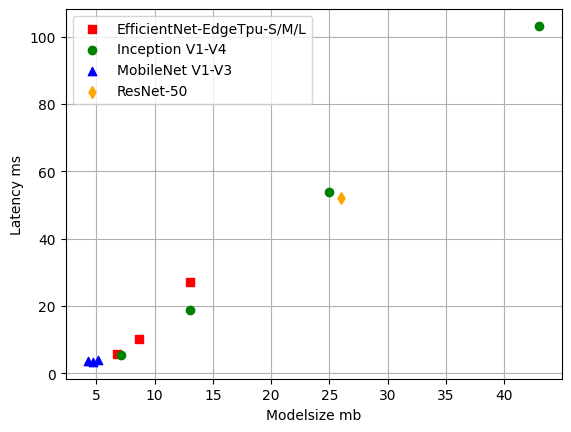

In [58]:
fig, ax = plt.subplots()

plt.xlabel('Modelsize mb')
plt.ylabel('Latency ms')
ax.set_axisbelow(True)
ax.grid()
ax.scatter(model_sizes[:3], mean_inf_times[:3], c='red', marker='s')
ax.scatter(model_sizes[3:7], mean_inf_times[3:7], c='green')
ax.scatter(model_sizes[7:10], mean_inf_times[7:10], c='blue', marker='^')
ax.scatter(model_sizes[10], mean_inf_times[10], c='orange', marker='d')
plt.legend(labels=['EfficientNet-EdgeTpu-S/M/L', 'Inception V1-V4', 'MobileNet V1-V3', 'ResNet-50'])

# zoomin plot
axins = zoomed_inset_axes(ax, 2, loc='lower right') # zoom = 2
axins.plot(ts)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")